**A Potential wrangle function:**

ignore for now

In [82]:
###  Big ole wrangle function for IF we wanna try out the model

# def wrangle(X):
#     """A function to clean our data"""
    
#     #Make a copy of the df
#     X = X.copy()

#     ## DROP unwanted columns; HiCard, urls, empty, redundant, etc.           80>|
#     drop_cols=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 
#                'neighborhood_overview', 'picture_url', 'host_url',
#                'host_name', 'host_since', 'host_location', 'host_about', 
#                'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
#                'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 
#                'amenities', 'calendar_updated', 'has_availability',
#                'calendar_last_scraped', 'minimum_minimum_nights', 
#                'maximum_minimum_nights', 'minimum_maximum_nights', 
#                'maximum_maximum_nights']
#     X.drop(columns=drop_cols, inplace=True)
    
#     ## A FUNC and execution thereof tallying number of host contacts that have been verified.
#     def num_contact(items):
#         items = items.replace('[','').replace(']','').replace("'",'').split(',')
#         return len(items)
#     X['host_verifications'] = X['host_verifications'].apply(num_contact)
    
#     ## Changing columns to BOOL vals     
#     # Convert "t/f" columns to BOOl columns.
#     def strToBool(text):
#       if text == 't':
#         return True
#       else:
#         return False
#     X['host_has_profile_pic'] = X['host_has_profile_pic'].apply(strToBool)
#     X['host_identity_verified'] = X['host_identity_verified'].apply(strToBool)
#     X['host_is_superhost'] = X['host_is_superhost'].apply(strToBool)
#     X['instant_bookable'] = X['instant_bookable'].apply(strToBool)
    
#     # Convert license column to BOOL column.
#     def licenseToBool(text):      
#         if type(text) != float: 
#             return True
#         else:
#             return False
#     X['license'] = X['license'].apply(lambda x: licenseToBool(x))  
    
    
#     ## Shorten/rename neighbourhood_cleansed' column as 'neighborhood'
#     X = X.rename({'neighbourhood_cleansed' : 'neighborhood'}, axis=1)
    
#     ### BATHROOM FUNCTIONS
#     ## Change 'bathroom_text' column name to 'num_bathroom', i.e. number of baths
#     X = X.rename({'bathrooms_text' : 'num_bathroom'}, axis=1)
#     # Drop 2 null values in the 'num_bathroom' column
#     X = X[X['num_bathroom'].isnull() == False]
#     # Engineer a feature to specify if baths are shared or not
#     def parse_baths_shared(string):
#         if 'shared' in string.lower(): # .lower because there is one value to remove
#             return True                # "Shared Half Bath", we do
#         else:
#             return False
#     X['shared_bath'] = X['num_bathroom'].apply(parse_baths_shared)
    
#     # Parse floats from the bathrooms_text column
#     def parse_baths(text):
#         if 'half-bath' in text.lower():
#             return 0.5

#         text = text.split(' ')
#         return float(text[0])
    
#     X = X[(df['price'] >= 24) & (X['price'] <= 2500)
#         # (X['latitude'] >=40.57) & (X['latitude'] < 40.99) & LAT Looks good
#         # (X['longitude'] >= -74.1) & (X['longitude'] <= -73.38)] LON looks good too

#     X['num_baths'] = X['num_bathroom'].apply(parse_baths)
#     X = X.drop(columns='num_bathroom')
#     ### END BATH
    
#     # Change 'price' data type from OBJECT to INT
#     X['price'] = X['price'].apply(lambda x: float(x.replace('$',"").replace(',','')))
    
#     # Change the data types of columns 'first_review' and 'last_review'
#     def datestojd(dt_str):
#         if type(dt_str) == float:
#             return dt_str
#         else:
#             jul_date = pd.to_datetime(dt_str)
#         return jul_date.to_julian_date()
#     X['first_review'] = X['first_review'].apply(lambda x: datestojd(x))
#     X['last_review'] = X['last_review'].apply(lambda x: datestojd(x))
        
#     return X

# **Begin VIZ WORK**

In [83]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df_raw = pd.read_csv('/content/listings.csv')
df_gz = pd.read_csv('/content/listings_gz.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [85]:
df_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86177,-76.98966,Private room,55,2,75,2021-01-12,0.60,2,365
1,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room,70,2,429,2018-08-07,2.99,2,365
2,4197,Bedroom in DC 2 blocks to Metro,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88791,-76.99668,Private room,80,28,45,2020-03-14,0.31,2,263
3,4529,Bertina's House Part One,5803,Bertina'S House,NaN,"Eastland Gardens, Kenilworth",38.90645,-76.94305,Private room,54,30,102,2019-07-05,0.73,1,84
4,4967,"DC, Near Metro",7086,Seveer,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room,99,2,31,2016-09-22,0.25,3,233


In [86]:
df_gz.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210217171634,2021-02-19,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,100%,86%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86177,-76.98966,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""Garden or backyard"", ""Shampoo"", ""Refrigerato...",$55.00,2,365,2.0,2.0,365.0,365.0,2.0,365.0,NaN,t,30,60,90,365,2021-02-19,75,4,0,2010-11-01,2021-01-12,92.0,9.0,9.0,10.0,10.0,8.0,9.0,NaN,f,2,0,2,0,0.60
1,3943,https://www.airbnb.com/rooms/3943,20210217171634,2021-02-19,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,17%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91066,-77.00438,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Garden or backyard"", ""Shampoo"", ""Air conditi...",$70.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,365,2021-02-19,429,0,0,2009-05-10,2018-08-07,96.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,0,2,0,2.99
2,4197,https://www.airbnb.com/rooms/4197,20210217171634,2021-02-19,Bedroom in DC 2 blocks to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/5e2bd169-b14f...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., District of Columbia, United ...",I’m a California native who came to work for t...,NaN,NaN,100%,t,https://a0.muscache.com/im/pictures/user/ddd27...,https://a0.muscache.com/im/pictures/user/ddd27...,Capitol Hill,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88791,-76.99668,Pr

In [87]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7793 non-null   int64  
 1   name                            7792 non-null   object 
 2   host_id                         7793 non-null   int64  
 3   host_name                       7781 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7793 non-null   object 
 6   latitude                        7793 non-null   float64
 7   longitude                       7793 non-null   float64
 8   room_type                       7793 non-null   object 
 9   price                           7793 non-null   int64  
 10  minimum_nights                  7793 non-null   int64  
 11  number_of_reviews               7793 non-null   int64  
 12  last_review                     56

In [88]:
df_gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7793 non-null   int64  
 1   listing_url                                   7793 non-null   object 
 2   scrape_id                                     7793 non-null   int64  
 3   last_scraped                                  7793 non-null   object 
 4   name                                          7792 non-null   object 
 5   description                                   7647 non-null   object 
 6   neighborhood_overview                         5110 non-null   object 
 7   picture_url                                   7793 non-null   object 
 8   host_id                                       7793 non-null   int64  
 9   host_url                                      7793 non-null   o

In [89]:
df_w.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_

In [90]:
df_raw[['latitude', 'longitude', 'price']].describe()

,latitude,longitude,price
count,7793.000000,7793.000000,7793.000000
mean,38.910939,-77.017589,186.218273
std,0.024127,0.029523,399.362871
min,38.821690,-77.110730,0.000000
25%,38.898170,-77.037320,72.000000
50%,38.910210,-77.020100,103.000000
75%,38.923330,-76.997230,171.000000
max,38.995370,-76.910320,10026.000000


In [91]:
df_eda = df_raw[['latitude', 'longitude', 'price']]

In [92]:
df_eda.describe()

,latitude,longitude,price
count,7793.000000,7793.000000,7793.000000
mean,38.910939,-77.017589,186.218273
std,0.024127,0.029523,399.362871
min,38.821690,-77.110730,0.000000
25%,38.898170,-77.037320,72.000000
50%,38.910210,-77.020100,103.000000
75%,38.923330,-76.997230,171.000000
max,38.995370,-76.910320,10026.000000


In [93]:
df_eda_price = df_eda.sort_values('price')

In [153]:
df_eda_price.iloc[100:201] # consider lower cut off at 24? There are 4 zeroes

,latitude,longitude,price
4788,38.91189,-77.01297,29
3524,38.92301,-76.97366,29
6501,38.90890,-77.00912,29
6516,38.90624,-77.00984,29
4437,38.87779,-76.98879,29
3258,38.87935,-76.98754,29
4280,38.92341,-76.97372,29
2482,38.92742,-77.02941,29
4045,38.87918,-76.98902,29
4042,38.87722,-76.98874,29


In [95]:
df_eda_price.iloc[7694:] # consider upper cut off at 2500?

,latitude,longitude,price
1845,38.91131,-77.03403,1400
7767,38.90063,-76.97856,1400
1538,38.88930,-77.00230,1400
7618,38.87877,-77.00811,1440
1785,38.91745,-77.01515,1450
1548,38.90016,-76.98485,1450
1359,38.93155,-77.02065,1476
2030,38.88261,-77.00539,1499
746,38.92552,-77.07326,1500
1749,38.91813,-77.00893,1500


Text(0.5, 0, 'Price of Properties')

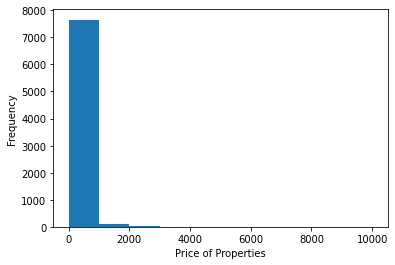

In [98]:
df_eda['price'].plot(kind='hist')
plt.xlabel('Price of Properties') # consider removing lats < 39.62 & > 39.80(13 rows)

In [99]:
df_eda_lat = df_eda.sort_values('latitude')

In [100]:
df_eda_lat.iloc[:101] # looks good

,latitude,longitude,price
6703,38.82169,-77.00525,70
3966,38.82275,-77.01089,72
6545,38.82370,-76.99887,55
6999,38.82408,-76.99769,60
4592,38.82447,-77.00878,60
6669,38.82450,-76.99779,60
6435,38.82460,-77.01061,70
438,38.82469,-77.00144,109
7576,38.82598,-77.00882,62
5153,38.82602,-77.00936,65


In [101]:
df_eda_lat.iloc[7694:] # looks good

,latitude,longitude,price
3787,38.96977,-77.03797,125
443,38.96991,-77.02428,96
46,38.96995,-77.01984,125
1630,38.97001,-77.01932,72
1107,38.97010,-77.02129,49
3254,38.97020,-77.01131,69
5853,38.97032,-77.02649,80
7583,38.97035,-77.05629,138
3731,38.97061,-77.00935,99
626,38.97063,-77.02470,50


Text(0.5, 0, 'Latitudes of Properties')

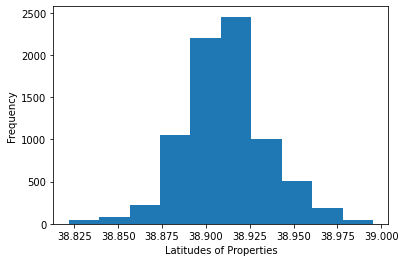

In [102]:
df_eda['latitude'].plot(kind='hist')
plt.xlabel('Latitudes of Properties') # consider removing lats < 39.62 & > 39.80(13 rows)

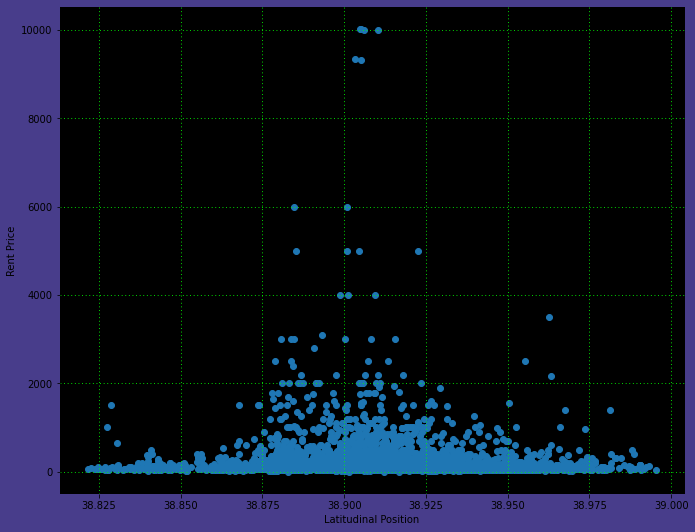

In [103]:
## latitude and price
fig, ax = plt.subplots(figsize=(11.2, 1.12*8))

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.scatter(x='latitude', y='price', data=df_eda)

ax.set_xlabel('Latitudinal Position')
ax.set_ylabel('Rent Price')

ax.grid(color='lime', linestyle=(0, (1, 3)), linewidth=0.9)

In [104]:
df_eda_long = df_eda.sort_values('longitude')

In [105]:
df_eda_long.iloc[:101] # Looks pretty good

,latitude,longitude,price
5048,38.93478,-77.11073,54
5007,38.93515,-77.11066,46
3062,38.92752,-77.10902,400
7143,38.92786,-77.10517,322
2835,38.92556,-77.10499,100
4009,38.92621,-77.10460,150
550,38.92778,-77.10344,95
3353,38.92625,-77.10307,54
1102,38.92486,-77.10231,61
2863,38.93021,-77.10222,90


In [106]:
df_eda_long.iloc[7694:]

,latitude,longitude,price
3771,38.88835,-76.93554,29
4155,38.89177,-76.93540,73
3822,38.90693,-76.93533,143
3574,38.89641,-76.93530,50
4607,38.89134,-76.93526,65
3823,38.90665,-76.93512,135
3821,38.90661,-76.93500,67
6448,38.88817,-76.93498,75
3818,38.90677,-76.93495,65
2328,38.87984,-76.93484,70


Text(0.5, 0, 'Longitudes of Properties')

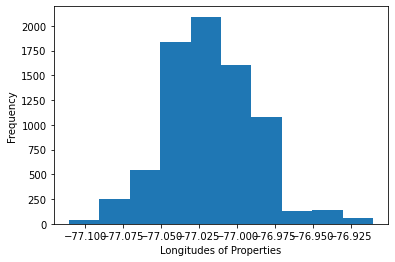

In [107]:
df_eda['longitude'].plot(kind='hist')
plt.xlabel('Longitudes of Properties') # consider removing lats < 39.62 & > 39.80(13 rows)

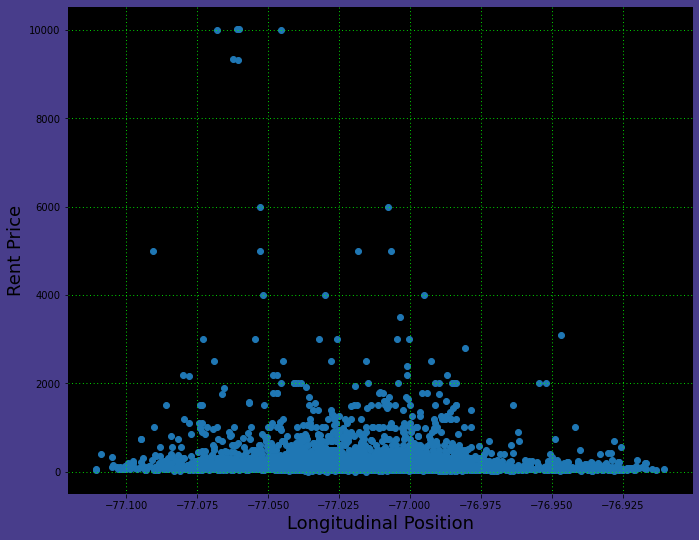

In [108]:
## longitude and price
fig, ax = plt.subplots(figsize=(11.2, 1.12*8))

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.scatter(x='longitude', y='price', data=df_eda)
ax.set_xlabel('Longitudinal Position', fontsize=18)
ax.set_ylabel('Rent Price', fontsize=18)

ax.grid(color='lime', linestyle=(0, (1, 3)), linewidth=0.9)

## Setting price cutoff, and comparing eda:

In [165]:
df_geo = df_raw[['latitude', 'longitude', 'price']].copy()
# try 24, 25, 30 :: 2500, 2100, 1600 
df_geo = df_geo[(df_geo['price'] >= 24) & (df_geo['price'] <= 2100)]

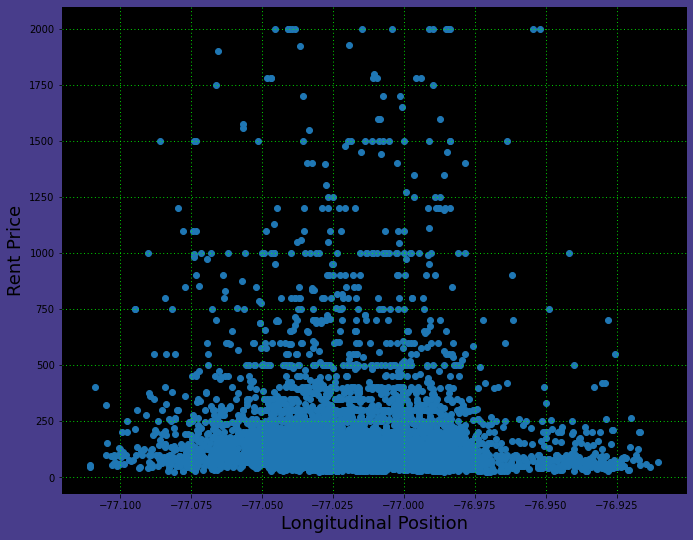

In [166]:
## longitude and price
fig, ax = plt.subplots(figsize=(11.2, 1.12*8))

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.scatter(x='longitude', y='price', data=df_geo)
ax.set_xlabel('Longitudinal Position', fontsize=18)
ax.set_ylabel('Rent Price', fontsize=18)

ax.grid(color='lime', linestyle=(0, (1, 3)), linewidth=0.9)

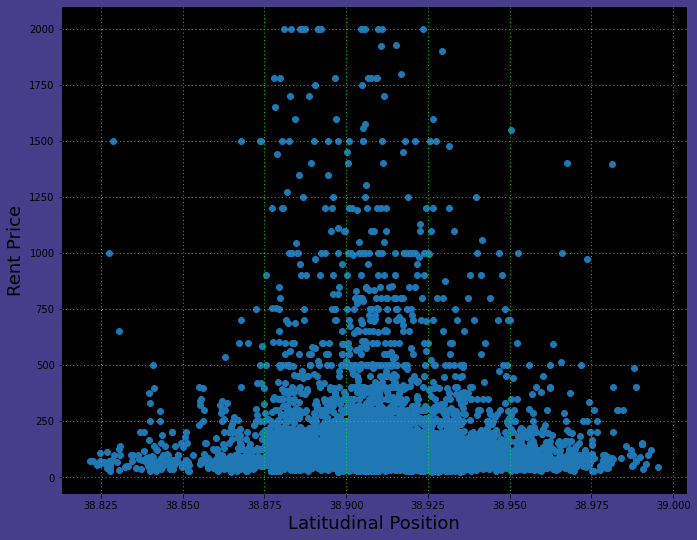

In [167]:
## longitude and price
fig, ax = plt.subplots(figsize=(11.2, 1.12*8))

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.scatter(x='latitude', y='price', data=df_geo)
ax.set_xlabel('Latitudinal Position', fontsize=18)
ax.set_ylabel('Rent Price', fontsize=18)

ax.grid(color='lime', linestyle=(0, (1, 3)), linewidth=0.9)

## Geopandas work:

In [168]:
### THE FOLLOWING WAS ME PLAYING IN GEOPANDAS, TRYING TO COMBINE LAT/LON INTO SINGLE FEATURE ###
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install --upgrade geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)


In [169]:
# df_geo_display = gpd.GeoDataFrame(
#     df_geo, geometry=gpd.points_from_xy(df_geo.longitude, df_geo.latitude))

# df_geo_display.head()

In [170]:
geometry = [Point(xy) for xy in zip(df_geo['longitude'], df_geo['latitude'])]
crs = 'EPSG:4326'

df_geo_display = gpd.GeoDataFrame(df_geo,
                                  crs=crs,
                                  geometry=geometry)

df_geo_display.head()

,latitude,longitude,price,geometry
0,38.86177,-76.98966,55,POINT (-76.98966 38.86177)
1,38.91066,-77.00438,70,POINT (-77.00438 38.91066)
2,38.88791,-76.99668,80,POINT (-76.99668 38.88791)
3,38.90645,-76.94305,54,POINT (-76.94305 38.90645)
4,38.91409,-76.99368,99,POINT (-76.99368 38.91409)


In [171]:
df_geo_display.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [172]:
dc_map = gpd.read_file('/content/Washington_DC_Boundary.shp')

In [173]:
dc_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

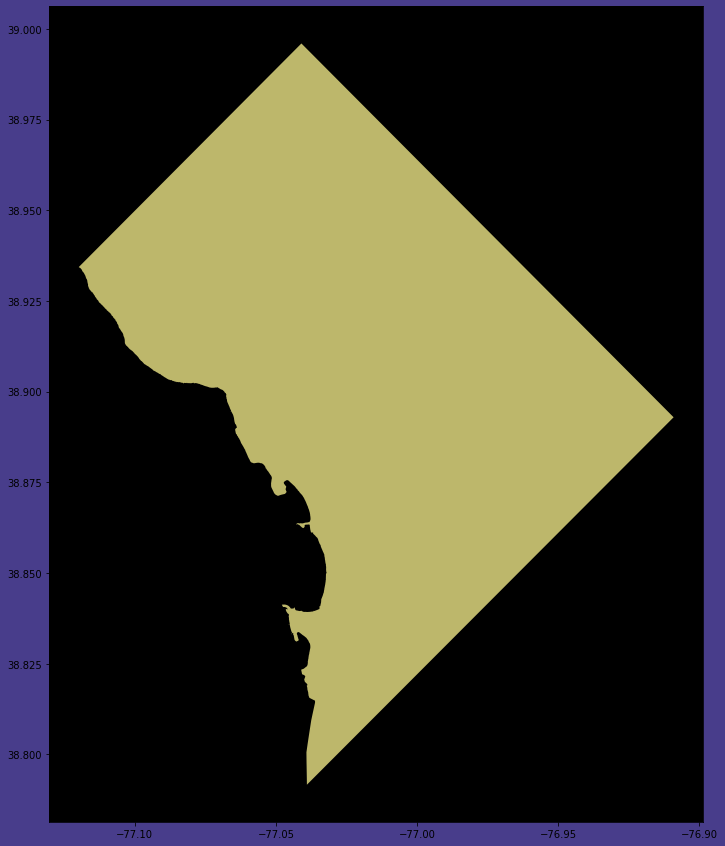

In [174]:
fig, ax = plt.subplots(figsize=(15,15))

#add map to ax
dc_map.plot(ax=ax, alpha=1, color='darkkhaki')

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')

plt.show();

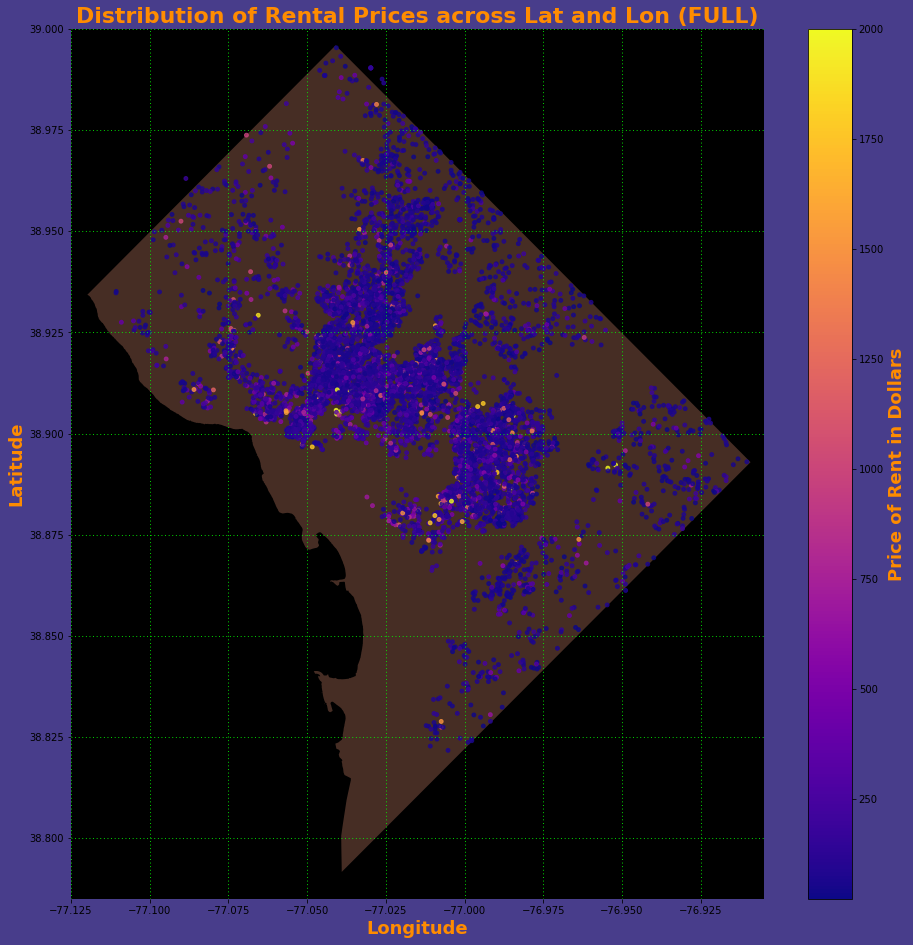

In [184]:
import matplotlib.colors as colors

# gotta make my own damn colorbar instead of making a "legend" in the geo plot
norm = colors.Normalize(vmin=df_geo_display['price'].min(),
                        vmax=df_geo_display['price'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='plasma')


#A WIDE VIEW with most rentals
fig, ax = plt.subplots(figsize=(16,16))

#add map to ax
dc_map.plot(ax=ax, 
            alpha=0.3, 
            color='darksalmon')

fig.set_facecolor('darkslateblue')
ax.set_facecolor('black')


# plt.rcParams['font.size'] = 12
df_geo_display.plot(column='price', 
                ax=ax, 
                alpha=0.8, 
                legend=False,  # HAD to set this to false
                # legend_kwds={'label':'Price of Rent in Dollars',},
                markersize=15,
                cmap='plasma')
                # cmap likes viridis(default), plasma, cividis(maybe), pink, 
                # spring(loud), summer(good), twilight(_shifted too), tab20(b, c!,,

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('Distribution of Rental Prices across Lat and Lon (FULL)',
             fontsize=22,
             fontweight='bold',
             color='darkorange')

ax.set_xlabel('Longitude', 
              fontsize=18,
              fontweight='bold', 
              color='darkorange')
plt.xlim(-77.125, -76.905)

ax.set_ylabel('Latitude',
              fontsize=18,
              fontweight='bold',
              color='darkorange')
plt.ylim(38.785, 39.0)

ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Price of Rent in Dollars',
                  fontsize=18,
                  fontweight='bold',
                  color='darkorange')

ax.grid(color='lime', 
        linestyle=(0, (1, 3)), 
        linewidth=0.9)

plt.show()